# 목차

1. 데이터의 형태

2. Linear Layer


---

### 데이터의 형태

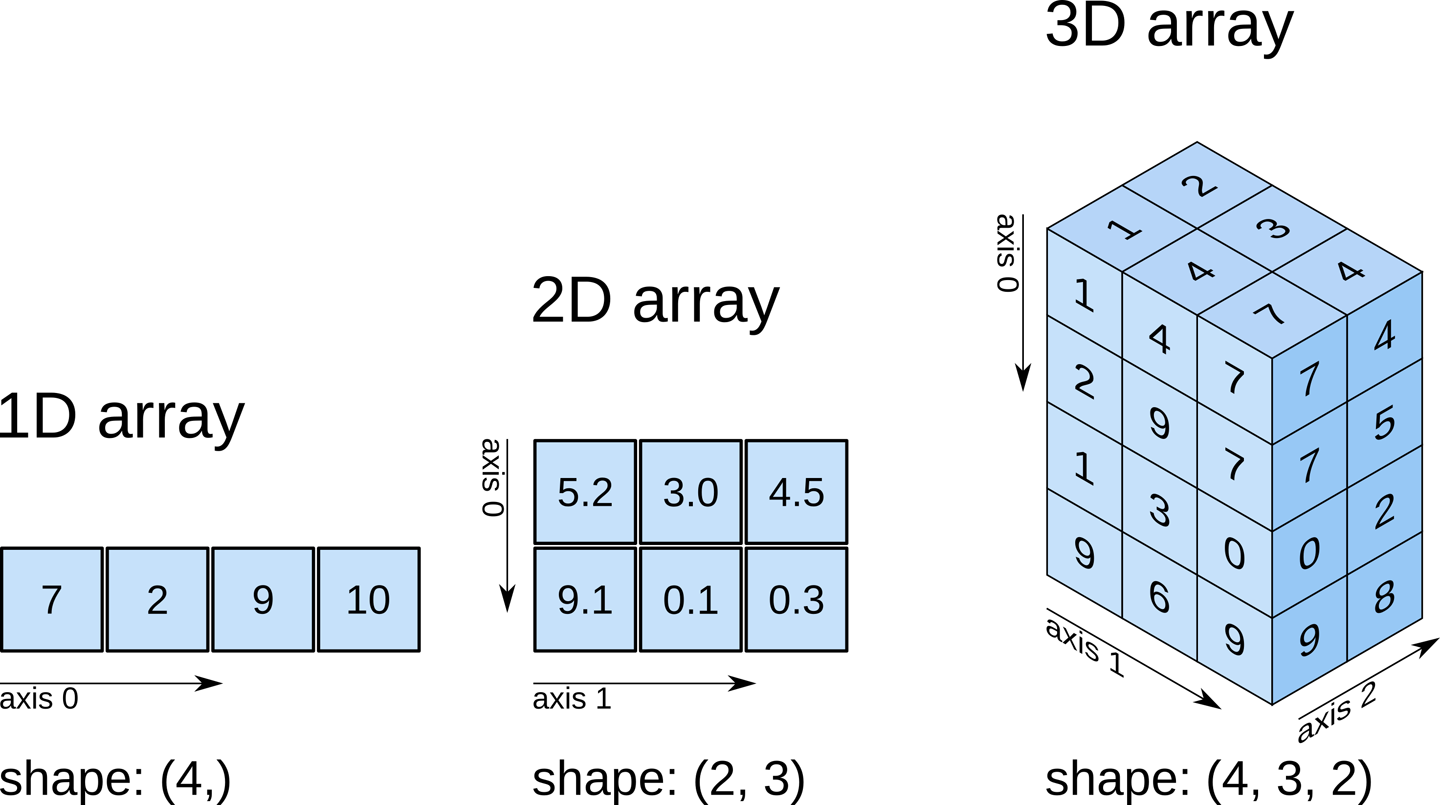


### layer

- 하나의 물체가 여러 개의 논리적인 객체들로 구성되는 경우, 이러한 각각의 객체를 하나의 레이어
   - 신경망은 물체를 구성하는 여러 개의 논리적인 레이어들을 이해하는 것이 곧 신경망을 이해하는 것과 같습니다.
      - 왜냐하면, 신경망은 레이어들의 각기 다른 weight, 그것들이 유기적으로 연결되어 이뤄내는 하나의 결과물이기 때문입니다.

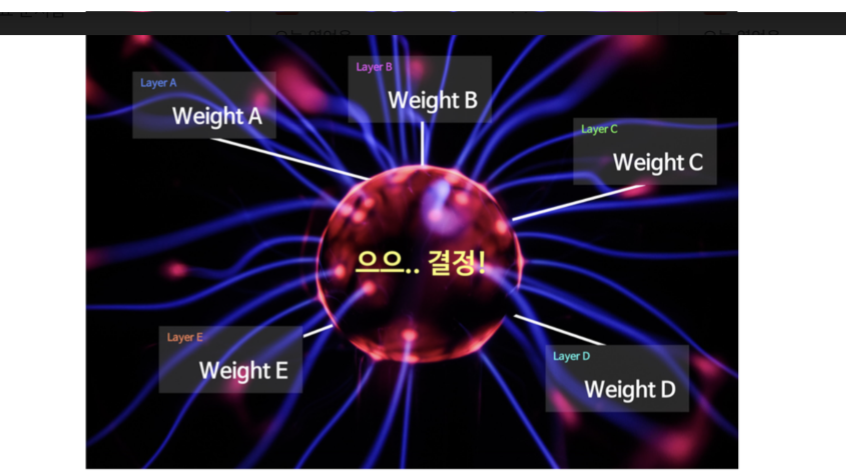

### 딥러닝의 근본적인 layer, Linear layer

- 선형대수학에서 쓰이는 용어 중 선형 변환과 동일한 기능을 합니다.

직관적인 이해: https://www.youtube.com/watch?v=vVvjYzFBUVk

수학적인 이해: https://www.youtube.com/watch?v=kYB8IZa5AuE


<br>

- 선형 변환을 활용하여 데이터를 특정 차원으로 변환하는 기능을 수행한다.

   - 예를 들어, 100차원의 데이터를 300차원으로 변환하면 데이터를 더 풍부하게 표현하는 효과

   - 100차원의 데이터를 10차원의 데이터로 변환하면 데이터를 집약시키는 효과

In [2]:
#데이터 집약
"""
여기서 각 행렬들이 weight이므로 Linear레이어는 (입력의 차원, 출력의 차원)에 해당하는
weight를 가지는 특성이 있다.
"""

#2차원을 1차원으로 변환하여 (2,1)행렬 선언

#우리가 쓸 라이브러리 즉 도구
import pandas as pd
import numpy as np
import tensorflow as tf


batch_size = 32 #총 데이터에서 몇 개의 데이터로 쪼갤 것인가. 1000 / 10 = 100. (총 데이터는 1000, batch_size=10, layer에 들어갈 데이터는 100)
boxes = tf.zeros((batch_size,4,2)) #0밖에 없는 4 x 2 행렬을 64개 만든다.

#print(boxes)
"""
Tensorflow는 Batch를 기반으로 동작
사각형 2개 세트를 batch_size개만큼 만든 후 처리
"""

print("1단계 연산 준비:", boxes.shape)

first_linear = tf.keras.layers.Dense(units=1, use_bias=False) #데이터를 1차원으로 바꾸고, b는 사용하지 않는 layer 생성
#units는 출력 차원 수를 의미한다.
#Weight 행렬 속 실수를 인간의 뇌 속 하나의 뉴런='유닛'취급

first_out = first_linear(boxes) #생성된 layer에 boxes 데이터 넣기
first_out = tf.squeeze(first_out, axis=-1) #1차원인 데이터의 정보 압출을 위해서 squeeze를 활용
#print(first_out)
print("1단계 연산 결과:", first_out.shape)
print("1단계 Linear Layer의 Weight 형태:", first_linear.weights[0].shape)



#4차원을 1차원으로 변환하여 (4,1)행렬 선언
print("\n2단계 연산 준비:", first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_out = second_linear(first_out)
second_out = tf.squeeze(second_out, axis=1)
print(second_out)
print("2단계 연산 결과:", second_out.shape)
print("2단계 Linear Weight의 Weight 형태:", second_linear.weights[0].shape)


print(first_linear.count_params()) 
print(second_linear.count_params()) 



1단계 연산 준비: (32, 4, 2)
1단계 연산 결과: (32, 4)
1단계 Linear Layer의 Weight 형태: (2, 1)

2단계 연산 준비: (32, 4)
tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.], shape=(32,), dtype=float32)
2단계 연산 결과: (32,)
2단계 Linear Weight의 Weight 형태: (4, 1)
2
4


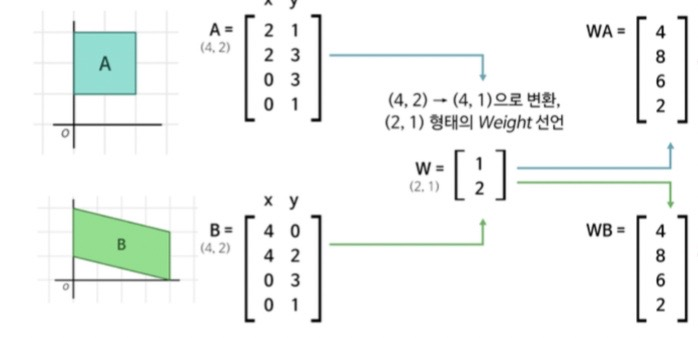

1단계 weight를 거친 후에 결과값이 동일해진다면, 입력값들의 특성을 구별할 수 없기에 Weight를 거치는 의미가 없습니다.

여기서 모든 Weight의의 모든든 요소를를 Parameter라고 합니다.

위처럼, 값이 동일해지는 문제를 어떻게 해결할까요?

**<식2>에서 쓰이는 파라미터의 개수는 총 몇 개일까요?(bias는 고려하지 않겠습니다)**

>1단계: (4,2) x (2 x 3) 행렬 = (4,3)

>2단계: (4,3) x (3 x 1) 행렬 = (4,)

>3단계: (4,) x (4 x 1)행렬 = (1,)

데이터 차원의 변화와 각 Weigh의 형태를 확인하고 tf.keras.Layer.count_params()함수를 인터넷에서 찾아본 후 활용하여 총 parameter 개수 찾기

In [ ]:
import tensorflow as tf

batch_size = 64
boxes = tf.zeros((batch_size,4,2))

print('1단계 연산 준비:', boxes.shape)

first_linear = tf.keras.layers.Dense(units=3, use_bias =False)
first_out = first_linear(boxes)

print('1단계 연산 결과:', first_out.shape)
print('1단계 Linear Layer의 Weight 형태:', first_linear.weights[0].shape)

print('\n2단계 연산 준비:', first_out.shape)

second_linear = tf.keras.layers.Dense(units=1, use_bias=False)
second_outs = second_linear(first_out)
second_outs = tf.squeeze(second_outs, axis=-1)
print(second_outs)


print('2단계 연산 결과:', second_out.shape)
print('2단계 Linear Layer의 Weight 형태:', second_linear.weights[0].shape)

print('\n3단계 연산 준비:', second_out.shape)

third_linear = tf.keras.layers.Dense(units=1, use_bias = False)
third_out = third_linear(second_outs)
third_out = tf.squeeze(third_out, axis=-1)

print("3단계 연산 결과:", third_out.shape)
print("3단계 Linear Layer의 Weight형태:", third_linear.weights[0].shape)


print(first_linear.count_params()) 
print(second_linear.count_params()) 
print(third_linear.count_params())



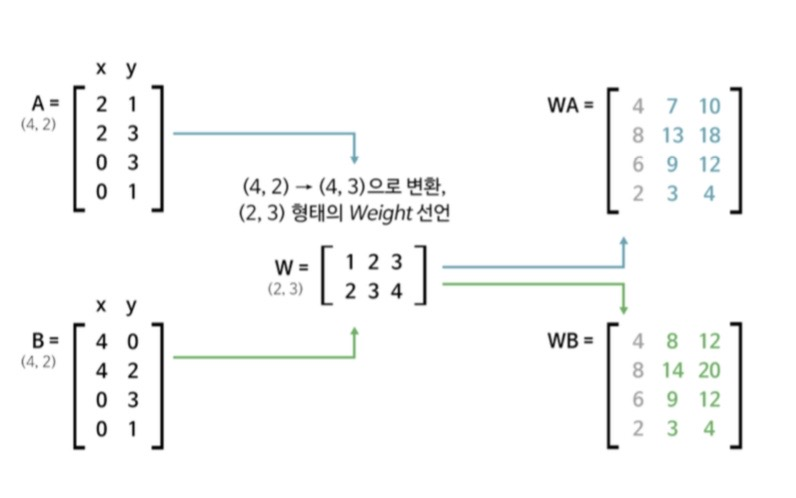

파라미터를 늘려보니 Weight 이후의 결과값이 다른 것으로 보아 Parameter를 늘리는 것이 답이었습니다. 근데 무조건 늘리기만 한다고 좋을까요? 그러면 훈련이 너무 잘 되어서 과적합을 일으킵니다.

**Summary**

- Weight의 형태로만 선언해주면 그 파라미터 값을 임의의 실수가 채웁니다

- 수 많은 데이터를 거치면서 가장 적합한 Weight를 알아서 찾아가는 과정이 훈련입니다.

- 적합한 파라미터라는 것은 주어진 데이터가 가지는 분포에 따라 결정됩니다. 



### Bias(편향)

- 인사법: y=wx
- 한국: y = wx+ 유교사상
- 프랑스: y= wx+ 아메리칸칸 마인드

- 각각의 문화에 편향이 되어있다.

<br>

- 선형변환된 값에 편향 파라미터 b를 더해주는 것으로 표현

- Wx에 단순히 더하는 것이므로 편향 값은 형태가 (선형변환 결과 차원,)인 한 줄짜리 weight로 정의

- Dense 클래스 속 use_bias 파라미터를 True로 바꿔주면 실험 가능

- Weight의 파라미터와 동일하게 수많은 데이터를 통해서 적합한 값 찾기

In [13]:

batch_size = 64
boxes = tf.zeros((batch_size,4,2))

print('1단계 연산 준비:', boxes.shape)

first_linear = tf.keras.layers.Dense(units=4, use_bias =True)
first_out = first_linear(boxes)

print('1단계 연산 결과:', first_out.shape)
print('1단계 Linear Layer의 Weight 형태:', first_linear.weights[0].shape)
print(first_linear.count_params()) 


1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 4)
1단계 Linear Layer의 Weight 형태: (2, 4)
12


In [ ]:

batch_size = 64
boxes = tf.zeros((batch_size,4,2))

print('1단계 연산 준비:', boxes.shape)

first_linear = tf.keras.layers.Dense(units=4, use_bias =False)
first_out = first_linear(boxes)

print('1단계 연산 결과:', first_out.shape)
print('1단계 Linear Layer의 Weight 형태:', first_linear.weights[0].shape)
print(first_linear.count_params()) 


1단계 연산 준비: (64, 4, 2)
1단계 연산 결과: (64, 4, 4)
1단계 Linear Layer의 Weight 형태: (2, 4)
8
